# LAMMPS Tutorials 02. Using variables and iterating in LAMMPS!

### Author: Mark Tschopp, mark.a.tschopp.civ at mail.mil

Please contact me if you have a problem with this tutorial, so I can modify in Github.  I have added FAQs, and will update my versions of LAMMPS in the future to keep the scripts current.

The latest version of this [Jupyter Notebook](http://ipython.org/notebook.html) tutorial is available at https://github.com/mrkllntschpp/lammps-tutorials.

The original tutorials are given here: https://icme.hpc.msstate.edu/mediawiki/index.php/LAMMPS_tutorials.  A number of these tutorials are out of date and have been ported over into the current iPython Jupyter Notebook tutorials on github.

***

## Description:
<a id="Sec1"></a>
This is part two of a tutorial for running LAMMPS simulation on a Windows machine. For this example, the molecular dynamics simulation calculates the equilibrium lattice constant and the corresponding cohesive energy for aluminum. This tutorial will introduce the use of variables via command line and using MATLAB/Python for running LAMMPS. 

<img src="https://icme.hpc.msstate.edu/mediawiki/images/e/ef/Fcc_stereo.gif" alt="Face-centered Cubic Lattice Structure" title="FCC Lattice Structure" />

## Complete Tutorial One 

If you have not done so already, complete the first tutorial available [here](https://github.com/mrkllntschpp/lammps-tutorials). 

***
## Step 1: Modify the input file 

This input script was run using the 24Jan2020 version of LAMMPS. Changes in some commands may require revision of the input script. In the below input script, the initial lattice constant (4) was replaced with the variable **latconst** (\${latconst}). Either modify the initial script `calc_fcc.in` or copy the text below and paste it into a new text file. Name the modified file: `calc_fcc_ver1.in`. If pasting, use the `Paste Special` command with `Unformatted Text`. Note, this requires the variable **latconst** to be manually passed in from the command line when executing lammps, e.g. `lmp_win_no-mpi -in calc_fcc_ver1.in -var latconst 4`. 

In [1]:
%%writefile calc_fcc_ver1.in
######################################
# LAMMPS INPUT SCRIPT
# Find minimum energy fcc configuration
# Mark Tschopp
# This requires the variable latconst to be input via the command line
# e.g., lmp_win_no-mpi -var latconst 4 < calc_fcc_ver1.in

######################################
# INITIALIZATION
clear 
units metal 
dimension 3 
boundary p p p 
atom_style atomic 
atom_modify map array

######################################
# ATOM DEFINITION
lattice fcc ${latconst}
region box block 0 1 0 1 0 1 units lattice
create_box 1 box

lattice fcc ${latconst} orient x 1 0 0 orient y 0 1 0 orient z 0 0 1  
create_atoms 1 box
replicate 1 1 1

######################################
# DEFINE INTERATOMIC POTENTIAL
pair_style eam/alloy 
pair_coeff * * Al99.eam.alloy Al
neighbor 2.0 bin 
neigh_modify delay 10 check yes 
 
######################################
# DEFINE COMPUTES 
compute eng all pe/atom 
compute eatoms all reduce sum c_eng 

#####################################################
# MINIMIZATION
reset_timestep 0 
fix 1 all box/relax iso 0.0 vmax 0.001
thermo 10 
thermo_style custom step pe lx ly lz press pxx pyy pzz c_eatoms 
min_style cg 
minimize 1e-25 1e-25 5000 10000 

variable natoms equal "count(all)" 
variable teng equal "c_eatoms"
variable length equal "lx"
variable ecoh equal "v_teng/v_natoms"

print "Total energy (eV) = ${teng};"
print "Number of atoms = ${natoms};"
print "Lattice constant (Angstoms) = ${length};"
print "Cohesive energy (eV) = ${ecoh};"

print "All done!"

Overwriting calc_fcc_ver1.in


***
## Step 2: Run in LAMMPS 
OK. Get to the command prompt and run the script that we just wrote.  It should look like this.

In [2]:
!lmp_serial -var latconst 4.0 < calc_fcc_ver1.in

LAMMPS (3 Mar 2020)
Lattice spacing in x,y,z = 4 4 4
Created orthogonal box = (0 0 0) to (4 4 4)
  1 by 1 by 1 MPI processor grid
Lattice spacing in x,y,z = 4 4 4
Created 4 atoms
  create_atoms CPU = 0.000392914 secs
Replicating atoms ...
  orthogonal box = (0 0 0) to (4 4 4)
  1 by 1 by 1 MPI processor grid
  4 atoms
  replicate CPU = 0.000504971 secs
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 8.28721
  ghost atom cutoff = 8.28721
  binsize = 4.1436, bins = 1 1 1
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/alloy, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d/newton
      bin: standard
Setting up cg style minimization ...
  Unit style    : metal
  Current step  : 0
Per MPI rank memory allocation (min/avg/max) = 4.495 | 4.495 | 4.495 Mbytes
Step PotEng Lx Ly Lz Press Pxx Pyy Pzz c_eatoms 


Try modifying the starting lattice constant from the command line, *e.g.*, to start with a lattice constant of 3.0 Angstroms, type 'lmp_serial -var latconst 3.0 < calc_fcc_ver1.in'. This will not affect the final values (above), but it will start the simulation with a lower lattice constant for the FCC structure.

In [3]:
!"C:/Program Files/LAMMPS 64-bit 24Jan2020/bin/lmp_serial" -var latconst 3.0 < calc_fcc_ver1.in

/bin/sh: 1: C:/Program Files/LAMMPS 64-bit 24Jan2020/bin/lmp_serial: not found


***
## Step 3: Iterate and Run in MATLAB 

Now, the exciting part! In this section, MATLAB will be used to run a LAMMPS simulation in Windows. Follow these steps: 
1. Open MATLAB 
1. Change to the directory that contains the LAMMPS executable (`lmp_serial.exe`), the input script (`calc_fcc_ver1.in`), and the potential file (`Al99.eam.alloy`). 
1. Type `system('lmp_serial -var latconst 4 < calc_fcc_ver1.in');` 
1. The simulation should show up on the MATLAB screen. When it completes, it will display "All done"! 

Now that you can run a simulation from MATLAB, it is easy to loop over a number of different lattice constants to calculate the energy. For instance, modify the input script again to only display the energy for the lattice constant input through the command line. The script should look like this: 

In [4]:
%%writefile calc_fcc_ver2.in
######################################
# LAMMPS INPUT SCRIPT
# Find minimum energy fcc configuration
# Mark Tschopp
# This requires the variable latconst to be input via the command line
# e.g., lmp_win_no-mpi -var latconst 4 < calc_fcc_ver1.in

######################################
# INITIALIZATION
clear 
units metal 
dimension 3 
boundary p p p 
atom_style atomic 
atom_modify map array

######################################
# ATOM DEFINITION
lattice fcc ${latconst} orient x 1 0 0 orient y 0 1 0 orient z 0 0 1  
region box block 0 1 0 1 0 1 units lattice
create_box 1 box
create_atoms 1 box
replicate 1 1 1

######################################
# DEFINE INTERATOMIC POTENTIAL
pair_style eam/alloy 
pair_coeff * * Al99.eam.alloy Al
neighbor 2.0 bin 
neigh_modify delay 10 check yes 
 
######################################
# RUN 0
run 0

variable natoms equal "count(all)" 
variable teng equal "pe"
variable length equal "lx"
variable ecoh equal "v_teng/v_natoms"

print "Total energy (eV) = ${teng};"
print "Number of atoms = ${natoms};"
print "Lattice constant (Angstoms) = ${length};"
print "Cohesive energy (eV) = ${ecoh};"
print "%% ecoh = ${ecoh};"

print "All done!" 

Overwriting calc_fcc_ver2.in


The `run 0` command can be used to calculate the energy of the system without actually running an iteration. Name this `calc_fcc_ver2.in` and combine this with a simple MATLAB script like this: 

```OCTAVE
% MATLAB Script for running LAMMPS multiple times

count = 0;
for i = 3.0:0.10:5.0
    command_line = ['lmp_win_no-mpi -var latconst ' num2str(i) ' < calc_fcc_ver2.in'];

    % this next line executes the command line
    system(command_line)

    % all that is left is to mine the 'log.lammps' file for the energy
    fid = fopen('log.lammps');
        tline = fgetl(fid);
        while ~feof(fid)
           matches = strfind(tline, '%%');
           num = length(matches);
           if num > 0 && matches == 1
                teval = strrep(tline,'%%','');
                eval(teval)
           end
           tline = fgetl(fid);
        end
    fclose(fid);

   % store the values in a matrix
   count = count + 1;
   X(count) = i; Y(count) = ecoh;
end

plot(X,Y,'-*r'), axis square
```

This script increases the lattice constant (variable `i`) from 3.0 to 5.0 Angstroms in increments of 0.10 Angstroms (`3.0:0.10:0.50`) AND calculates the energy for each lattice constant. As an easy extension, MATLAB can now be used to run hundreds of simulations, extract energies, and plot the lattice constant-energy curve in a matter of a minute or so. Notice the line `print "%% ecoh = ${ecoh};"` in the `calc_fcc_ver2.in` script.  The '\%\%' is used as a flag for when MATLAB mines the `log.lammps` file. This MATLAB script iteratively reads every line in the `log.lammps` file and checks to see if the flag \%\% is contained within each line. When MATLAB finds a line with the flag, it removes the flag, and evaluates (`eval`) the rest of the line in MATLAB (which converts the string to a variable in the MATLAB stack). Notice that vector `X` in MATLAB contains the lattice constant that is passed to LAMMPS and vector `Y` in MATLAB now contains the potential energy `ecoh` that was computed in LAMMPS.

***
## Run Iteratively in Python

Now let's try it in Python.

In [5]:
import numpy as np
import subprocess 
import shlex
import time

start_time = time.time()
j = 0
x = []
for i in list(np.arange(3.00, 5.05, 0.10)):
    command_line = f'lmp_serial -in calc_fcc_ver2.in -var latconst {i:0.02f} -log log_{j:03d}.lammps'
    x.append(round(i,3))
    j += 1
    print(command_line)
    args = shlex.split(command_line)
#    p = subprocess.call(args) # Success! but much slower...
    p = subprocess.Popen(args) # Success!
    
print(x)
print("--- %s seconds ---" % (time.time() - start_time))


lmp_serial -in calc_fcc_ver2.in -var latconst 3.00 -log log_000.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 3.10 -log log_001.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 3.20 -log log_002.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 3.30 -log log_003.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 3.40 -log log_004.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 3.50 -log log_005.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 3.60 -log log_006.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 3.70 -log log_007.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 3.80 -log log_008.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 3.90 -log log_009.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 4.00 -log log_010.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 4.10 -log log_011.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 4.20 -log log_012.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 4.30 -log log_013.lammps
lmp_se

Wow!  That ran quickly.  And, it created a bunch of log files.  I purposedly separated the different parts of this process in Python.  Now, we are going to read the cohesive energy for each lattice constant into a variable and store it in a vector.  While I removed the `;` in the flagged line for execution in Python, I could have just modified the script so that it was Python executable, as opposed to MATLAB executable. 

In [6]:
# how do I read each line in script, find the flag, and assign ecoh to a vector Y for plotting

import glob, os
import time

start_time = time.time()
target = "%%"
y = []
for file in glob.glob("log_*.lammps"):
    with open(file) as f:
        for line in f:
            if target in line and "print" not in line:
                exec(line.replace("%% ","").replace(";",""))
                y.append(ecoh)

print("--- %s seconds ---" % (time.time() - start_time))


--- 0.00502324104309082 seconds ---


OK.  Now that I have both of those, let's put everything together and plot it.

lmp_serial -in calc_fcc_ver2.in -var latconst 3.00 -log log_000.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 3.10 -log log_001.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 3.20 -log log_002.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 3.30 -log log_003.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 3.40 -log log_004.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 3.50 -log log_005.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 3.60 -log log_006.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 3.70 -log log_007.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 3.80 -log log_008.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 3.90 -log log_009.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 4.00 -log log_010.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 4.10 -log log_011.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 4.20 -log log_012.lammps
lmp_serial -in calc_fcc_ver2.in -var latconst 4.30 -log log_013.lammps
lmp_se

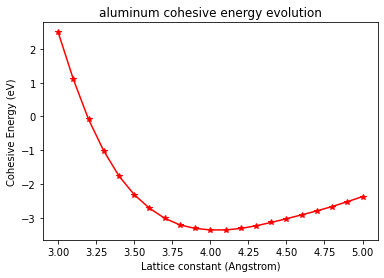

In [7]:
import numpy as np
import subprocess 
import shlex
import glob, os
import time

start_time = time.time()

j = 0
x = []
y = []
target = "%%"
for i in list(np.arange(3.00, 5.05, 0.10)):
    command_line = f'lmp_serial -in calc_fcc_ver2.in -var latconst {i:0.02f} -log log_{j:03d}.lammps'
    x.append(round(i,3))
    file = f"log_{j:03d}.lammps"
    j += 1
    print(command_line)
    args = shlex.split(command_line)
    p = subprocess.Popen(args) # Success!
    p.wait()
    with open(file) as f:
        for line in f:
            if target in line and "print" not in line:
                exec(line.replace("%% ","").replace(";",""))
                y.append(ecoh)

print("--- %s seconds ---" % (time.time() - start_time))
                
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *
figure()
plot(x, y, 'r*-')
xlabel('Lattice constant (Angstrom)')
ylabel('Cohesive Energy (eV)')
title('aluminum cohesive energy evolution')
show()

Hmm.  It's quite a bit slower when you have to wait within a loop for each subprocess to finish with the `.wait()` command.  I had to put that in the script so it didn't start a subprocess and while it is still running, the Python script would try to open up the log file.   

***
## LAMMPS Input Script Explained

In this section, we will break down what LAMMPS is doing. The easy way to do this on your own is to consult the LAMMPS manual for each command or go to the Internet LAMMPS manual, *i.e.*, at https://lammps.sandia.gov

So, first, what is different in this example?  Many of the LAMMPS commands have been explained in Tutorial 1.  Here is what I think is important in this tutorial.

### `Variable` command

<br>
<div class="alert alert-block alert-info">
lattice fcc \${latconst} <br>
region box block 0 1 0 1 0 1 units lattice <br>
create_box 1 box <br><br>
lattice fcc \${latconst} orient x 1 0 0 orient y 0 1 0 orient z 0 0 1 <br>
create_atoms 1 box <br>
replicate 1 1 1
</div>

OK. Do you remember those variables from the first LAMMPS input script? They can be fed in from the command line as well.  This is a great example of passing in the constant `latconst` from the command line and then using it within other LAMMPS commands.  If you combed through the script, you won't find any `variable` command that sets `latconst` to anything, i.e., because it is meant to be set from the command line.  It's usually a good idea to add a comment about the command line syntax or what variables need to be set outside of the script.

### Print `%%` in log file.  Print and retrieve!

<br>
<div class="alert alert-block alert-info">
print "%% ecoh = ${ecoh};"
</div>

You are likely to miss this line if I didn't specifically call it out in the tutorial. This was just an easy way to flag certain lines within the log file, which is filled with all sorts of stuff.  There are a number of different iterations of this and you'll see in the tutorials how this is used in different ways to extract data from the LAMMPS simulations.  I like having all the information in a file, and then being able to extract it when I need to.

But Mark, why didn't you just compile LAMMPS with Python and seemlessly pass information back-and-forth?  Well, because this is really easy to set up. Plus, my days of compiling Fortran versions of codes like LAMMPS on various supercomputers has left me permanently scarred.  It's gotten better, I know, but if I can not compile LAMMPS on a **WINDOWS** machine to people how to do a few things... I'll take it! 

***
## FAQs 

<br>
<div class="alert alert-danger">
Q1: So, what does the `run 0` command actually do? Is it minimization? Is it molecular dynamics?
</div>

A: The `run 0` command is not minimization or molecular dynamics. The atoms are not displaced at all by this command. This is merely a way for LAMMPS to know that it needs to calculate additionally information for each atom or for the entire system. For instance, before the `run 0` command, LAMMPS may not know the forces on each atom or the energy for the entire system. By executing the `run 0` command, LAMMPS will calculate all the forces and attributes necessary to run molecular dynamics, but will not actually perform the timestep at the end, moving the atoms. Now, the user can print these attributes to screen or to a dumpfile, etc. 

In some cases, the user will need to tell LAMMPS what values they want LAMMPS to calculate prior to a `run 0` command. For example, if you want the stresses on every atom, you will need to define a compute or a variable command prior to `run 0` and then let LAMMPS know that you need this value by inserting it in to the `thermo_style` command (like in Tutorial 3!). For more information, see the LAMMPS documentation on the run command. 

***
## Tutorial Links

* [Click here to open Tutorial 1](LAMMPS-Tutorials-01.ipynb)
* [Click here to open the next tutorial](LAMMPS-Tutorials-03.ipynb)

***
## References 

1. S. Plimpton, "Fast Parallel Algorithms for Short-Range Molecular Dynamics," J. Comp. Phys., 117, 1-19 (1995).